In [1]:
!pip install shap

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import joblib
import shap
from PIL import Image
import PIL

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
!pip install dabl

In [4]:
import dabl

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/prajapur/AppliedML_Project/main/RTA%20Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [8]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


<Axes: xlabel='Accident_severity'>

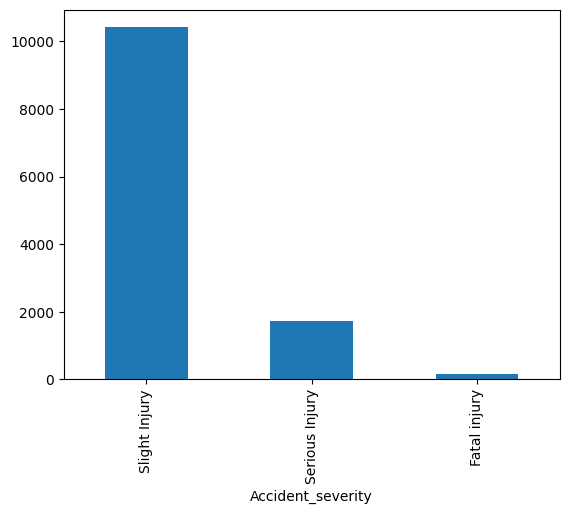

In [9]:
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot(kind='bar')

<Axes: xlabel='Educational_level'>

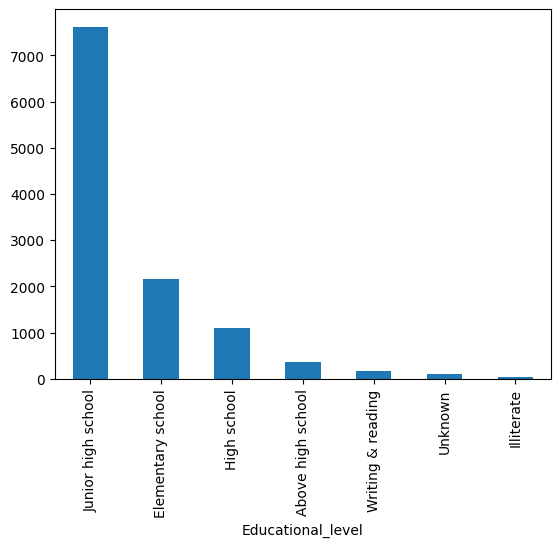

In [10]:
df['Educational_level'].value_counts().plot(kind='bar')

<Figure size 600x500 with 0 Axes>

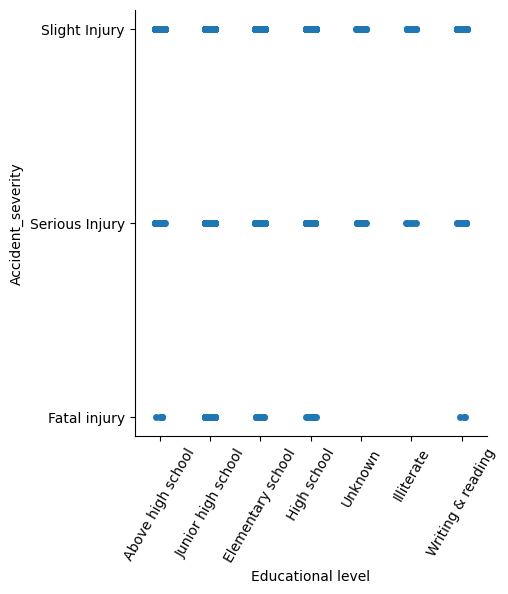

In [11]:
# plot a point plot for categorical features and target variable
plt.figure(figsize=(6,5))
sns.catplot(x='Educational_level', y='Accident_severity', data=df)
plt.xlabel("Educational level")
plt.xticks(rotation=60)
plt.show()

/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series)
/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back 

Target looks like classification
Showing only top 10 of 31 categorical features


/usr/local/lib/python3.10/dist-packages/dabl/plot/utils.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont = pd.crosstab(data[cols], data[rows])


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Accident_severity'>,
 [array([[<Axes: xlabel='Number_of_casualties', ylabel='Number_of_casualties'>]],
        dtype=object)],
 array([[<Axes: title={'center': 'Number_of_vehicles_involved'}>,
         <Axes: title={'center': 'Types_of_Junction'}>,
         <Axes: title={'center': 'Age_band_of_driver'}>,
         <Axes: title={'center': 'Weather_conditions'}>,
         <Axes: title={'center': 'Type_of_vehicle'}>],
        [<Axes: title={'center': 'Area_accident_occured'}>,
         <Axes: title={'center': 'Cause_of_accident'}>,
         <Axes: title={'center': 'Day_of_week'}>,
         <Axes: title={'center': 'Light_conditions'}>,
         <Axes: title={'center': 'Type_of_collision'}>]], dtype=object)]

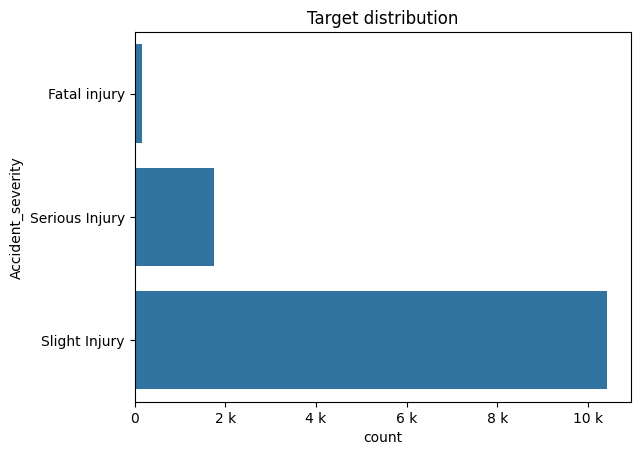

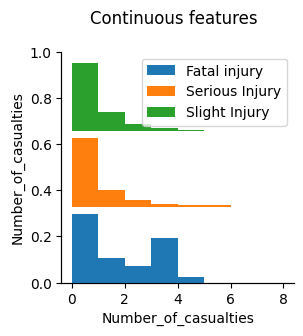

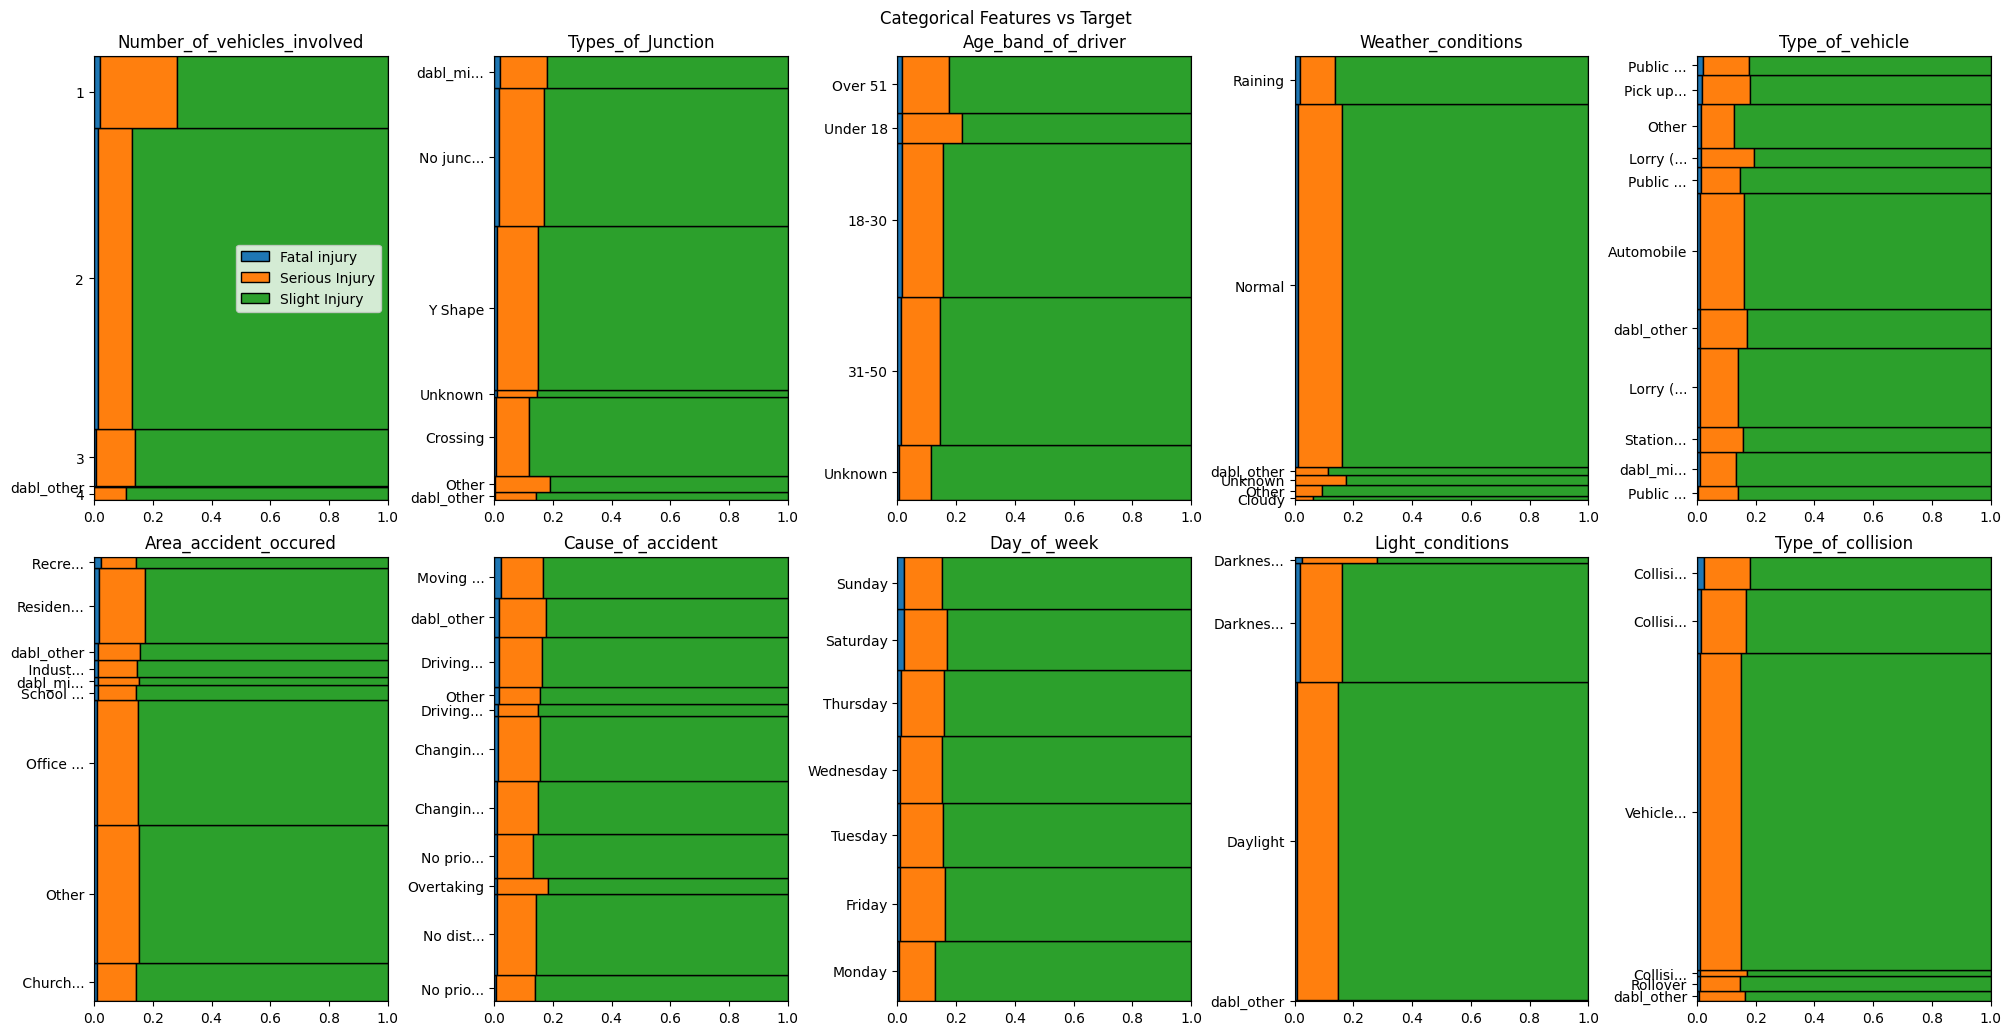

In [12]:
dabl.plot(df, target_col='Accident_severity')

Road_surface_type
Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

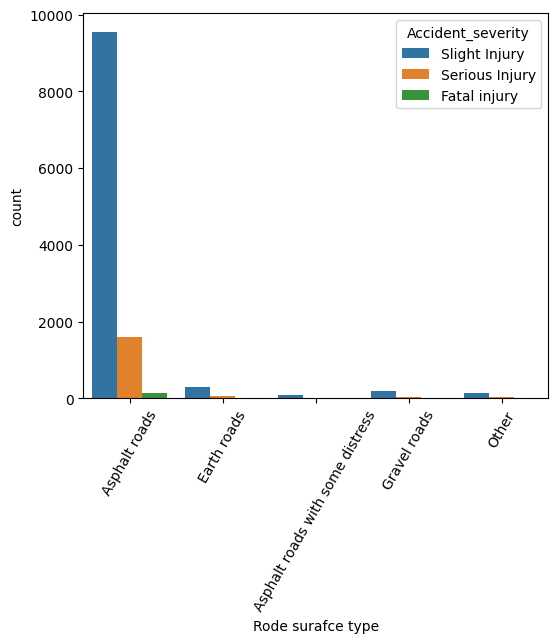

In [14]:
print(df['Road_surface_type'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=df)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=60)
plt.show

Road_surface_conditions
Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

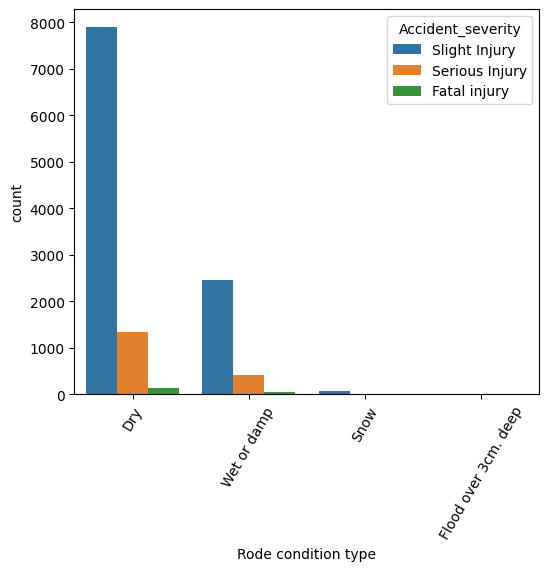

In [15]:
print(df['Road_surface_conditions'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_conditions', hue='Accident_severity', data=df)
plt.xlabel('Rode condition type')
plt.xticks(rotation=60)
plt.show

In [16]:
pivot_df = pd.pivot_table(data=df,
               index='Road_surface_conditions',
               columns='Accident_severity',
               aggfunc='count')

fatal_df = pivot_df['Road_surface_type']
fatal_df.fillna(0, inplace=True)
fatal_df['sum_of_injuries'] = fatal_df['Fatal injury'] + fatal_df['Serious Injury'] + fatal_df['Slight Injury']
fatal_df

<ipython-input-16-33a92dd47a45>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_df.fillna(0, inplace=True)
<ipython-input-16-33a92dd47a45>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_df['sum_of_injuries'] = fatal_df['Fatal injury'] + fatal_df['Serious Injury'] + fatal_df['Slight Injury']


Accident_severity,Fatal injury,Serious Injury,Slight Injury,sum_of_injuries
Road_surface_conditions,,,,
Dry,121.0,1312.0,7774.0,9207.0
Flood over 3cm. deep,0.0,0.0,2.0,2.0
Snow,0.0,4.0,65.0,69.0
Wet or damp,36.0,404.0,2426.0,2866.0


In [17]:
fatal_df_dry = (fatal_df.loc['Dry']/fatal_df.loc['Dry','sum_of_injuries'])*100
fatal_df_dry

Accident_severity
Fatal injury         1.314217
Serious Injury      14.250027
Slight Injury       84.435755
sum_of_injuries    100.000000
Name: Dry, dtype: float64

In [18]:
fatal_df_snow = (fatal_df.loc['Wet or damp']/fatal_df.loc['Wet or damp','sum_of_injuries'])*100
fatal_df_snow

Accident_severity
Fatal injury         1.256106
Serious Injury      14.096301
Slight Injury       84.647592
sum_of_injuries    100.000000
Name: Wet or damp, dtype: float64

In [19]:
df.groupby('Road_surface_conditions')['Accident_severity'].count()

Road_surface_conditions
Dry                     9340
Flood over 3cm. deep       2
Snow                      70
Wet or damp             2904
Name: Accident_severity, dtype: int64

In [20]:
df['Time'] = pd.to_datetime(df['Time'])

<ipython-input-20-1bfd8981fe14>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [21]:
obj_cols = [col for col in df.columns if df[col].dtypes == 'object']
obj_cols2 = [col for col in obj_cols if col != 'Accident_severity']
obj_cols2

['Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident']

In [22]:
# remove time column from datafram
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


<ipython-input-23-950690d6bc63>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


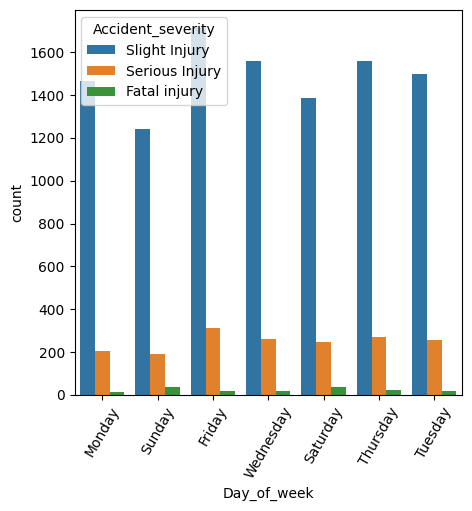

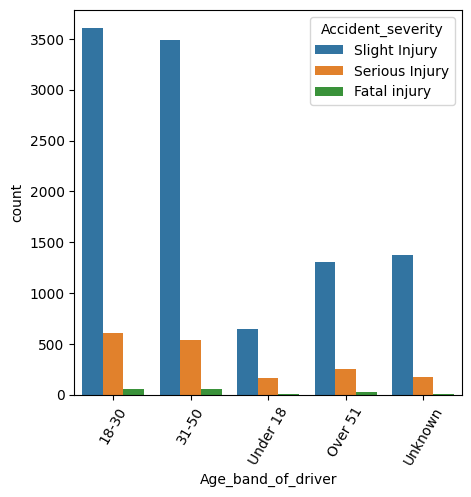

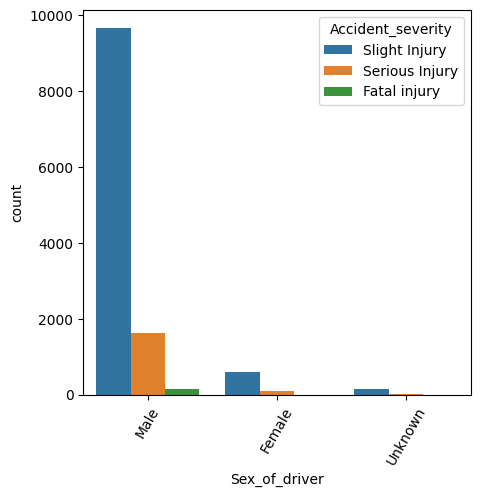

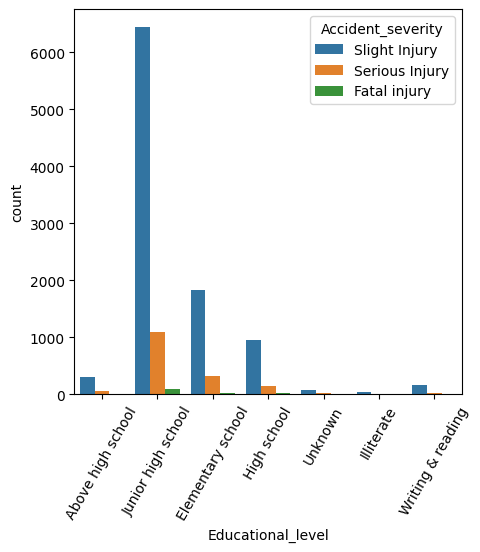

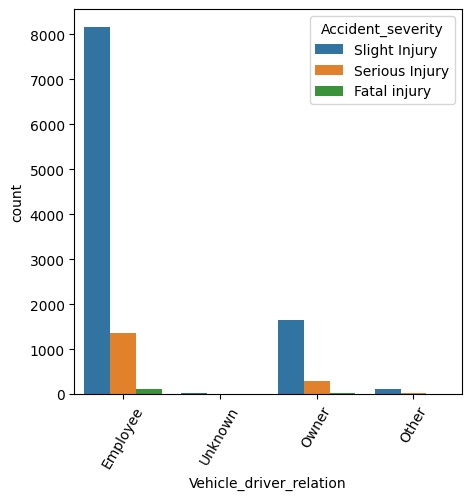

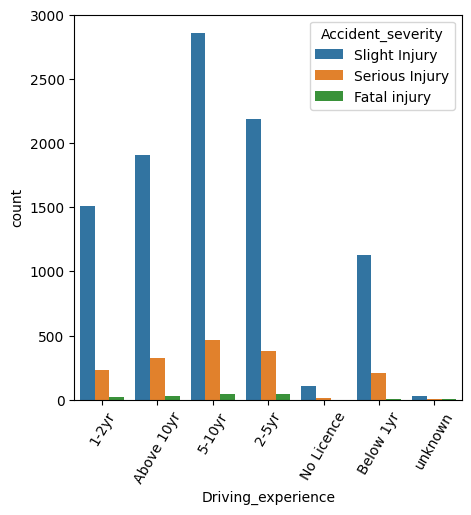

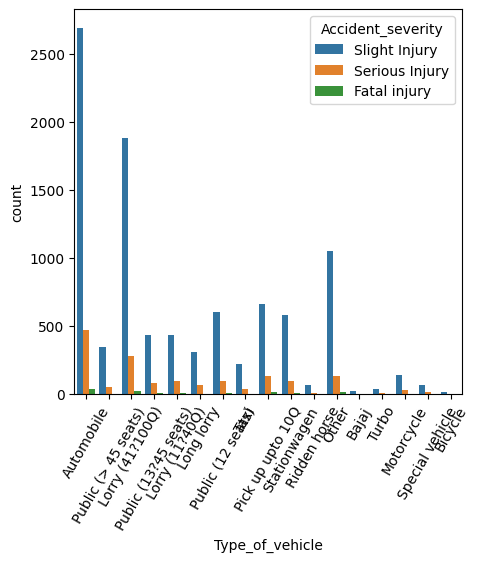

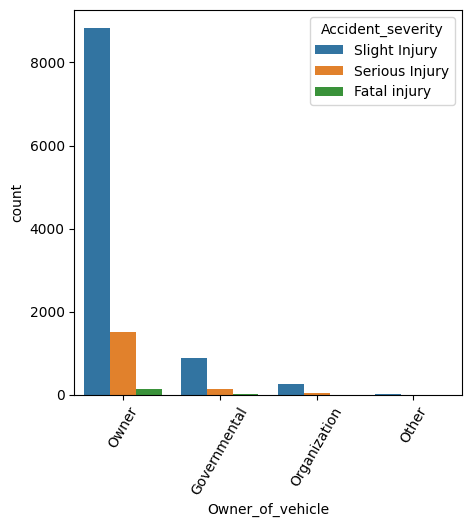

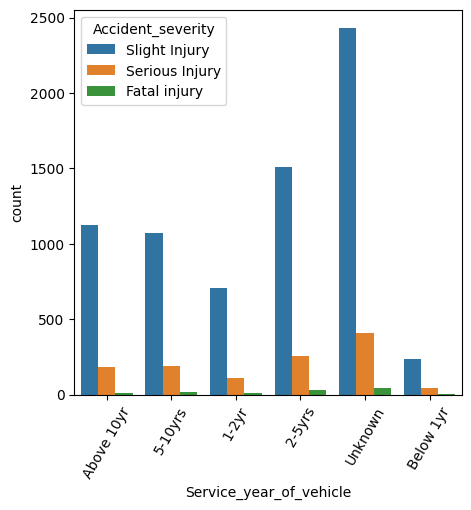

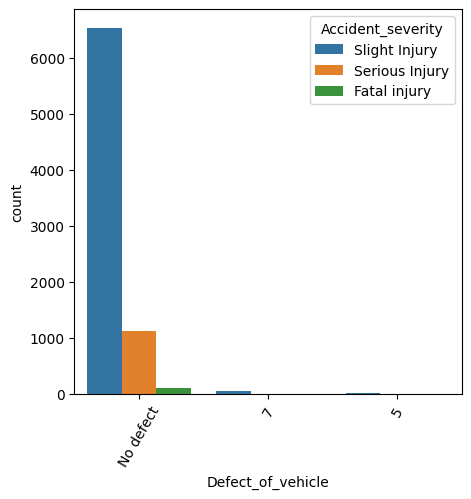

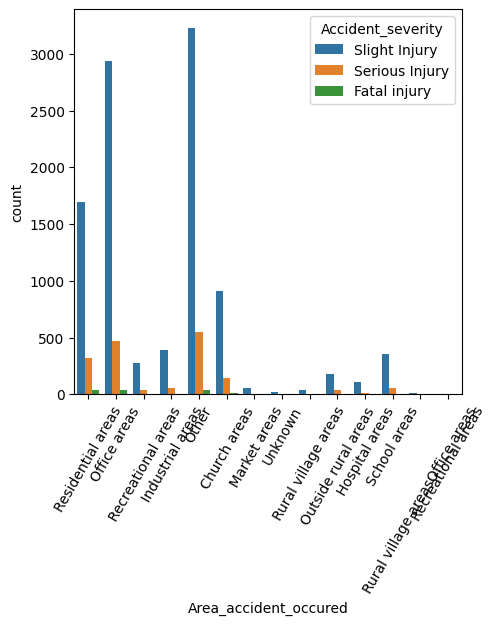

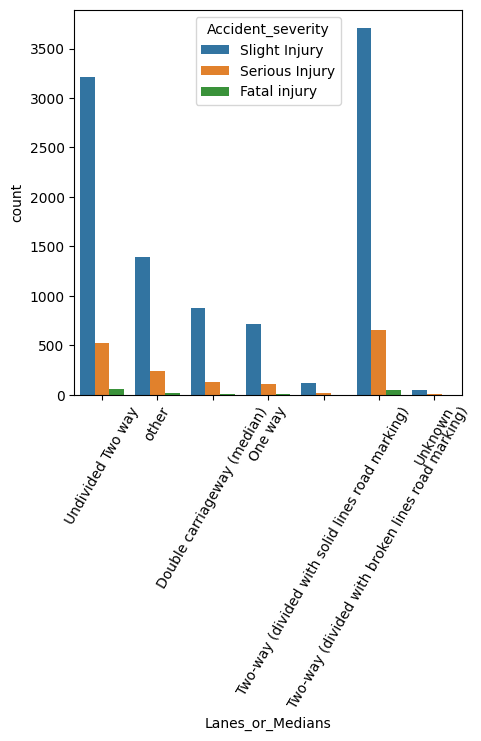

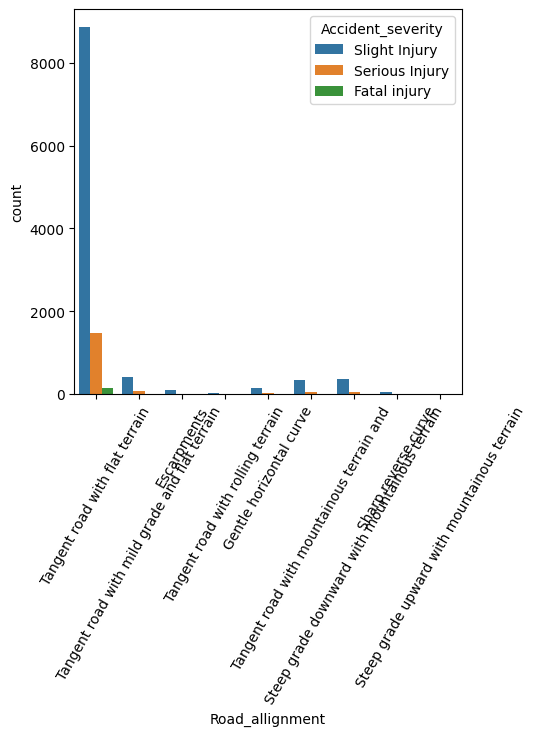

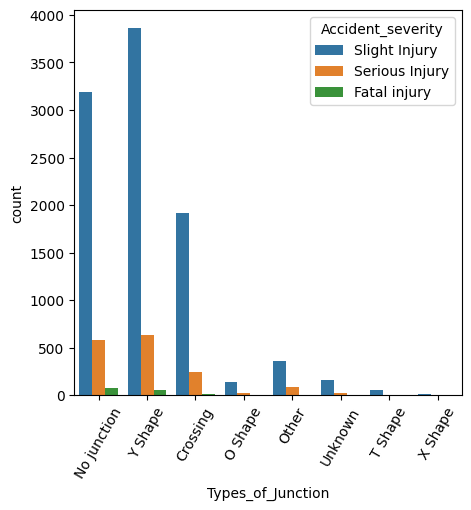

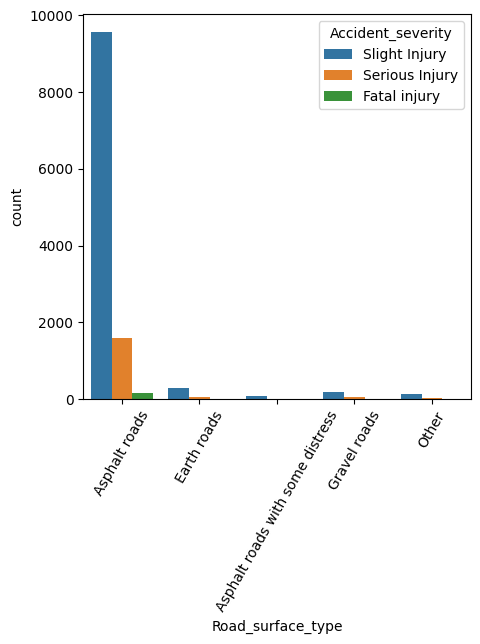

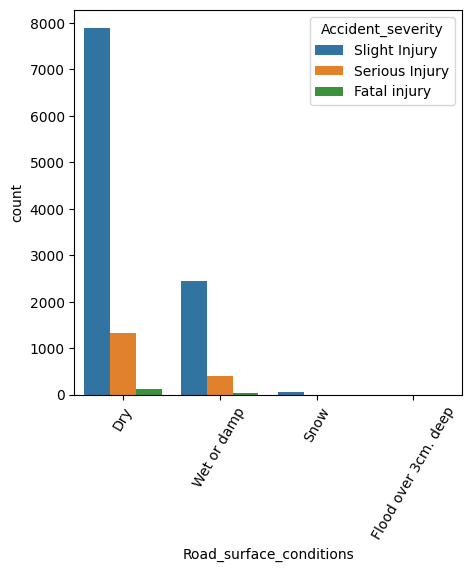

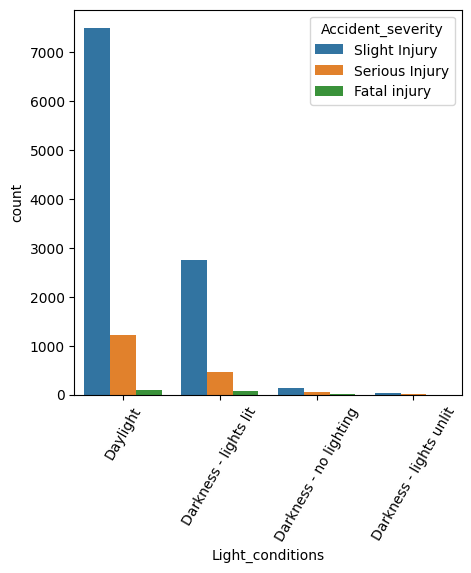

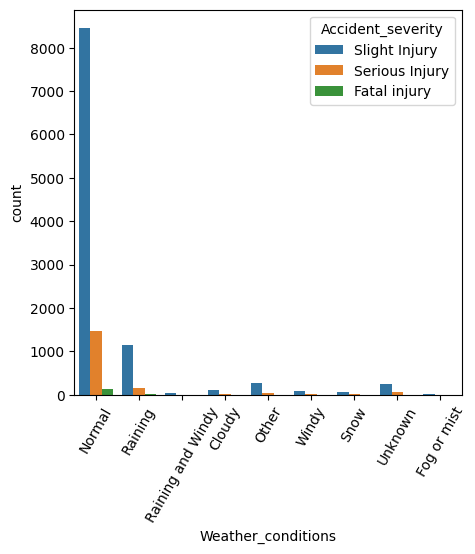

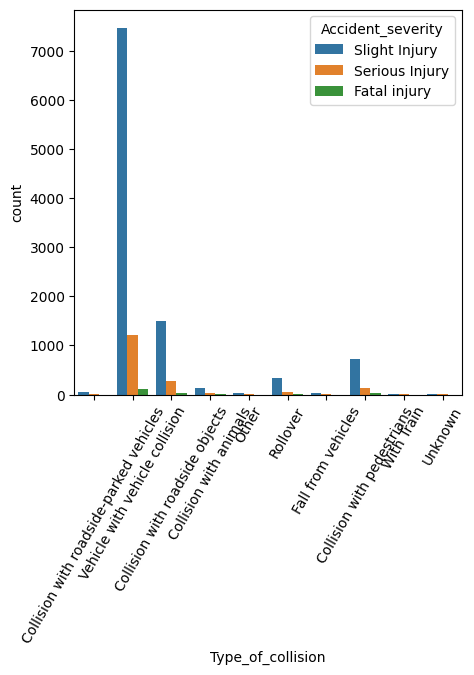

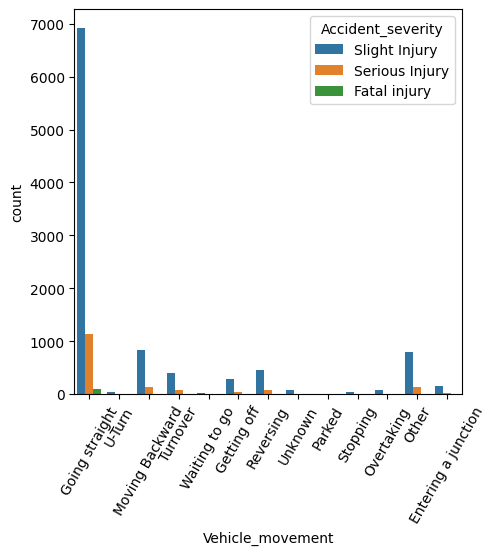

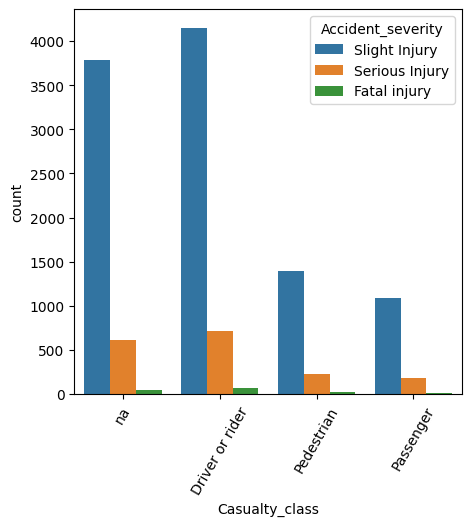

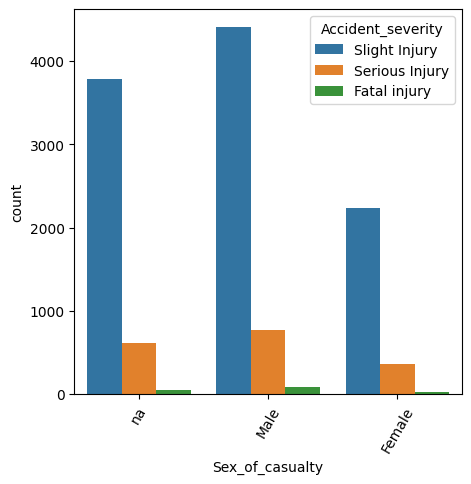

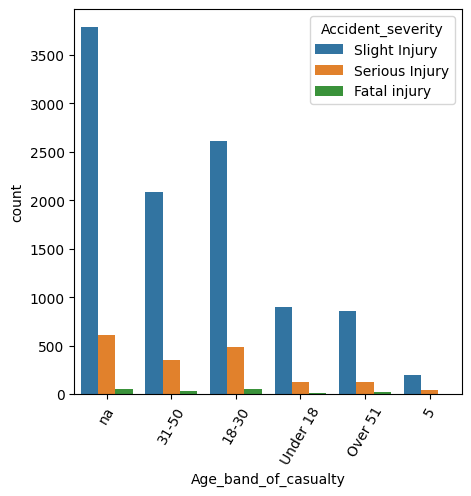

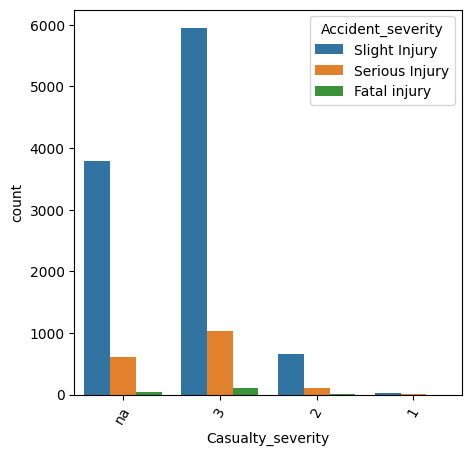

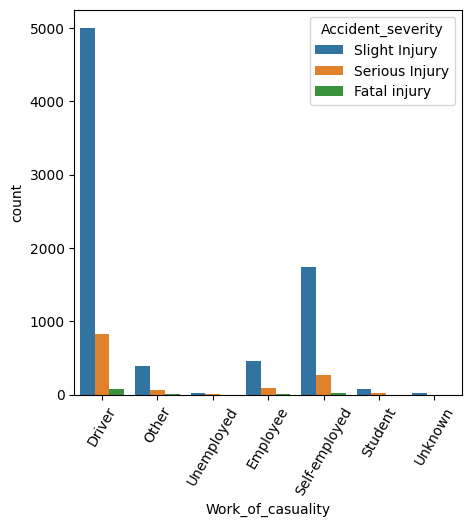

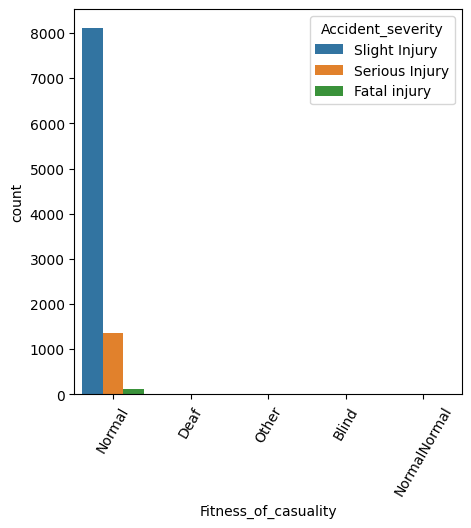

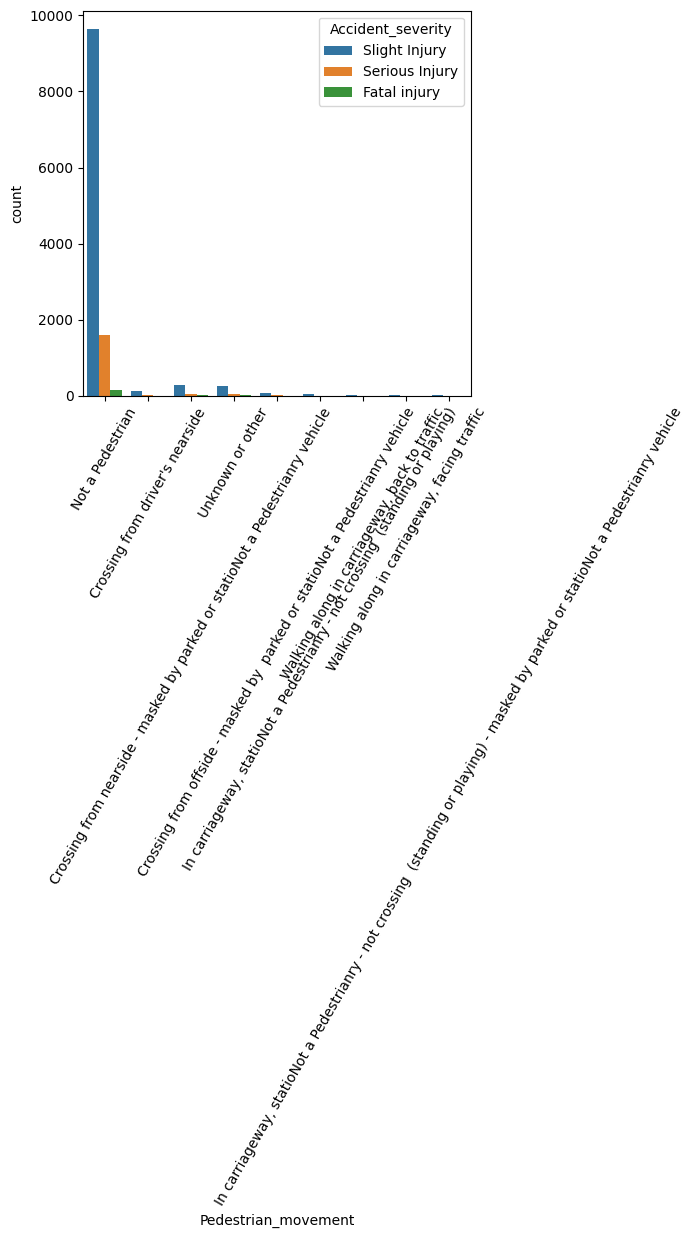

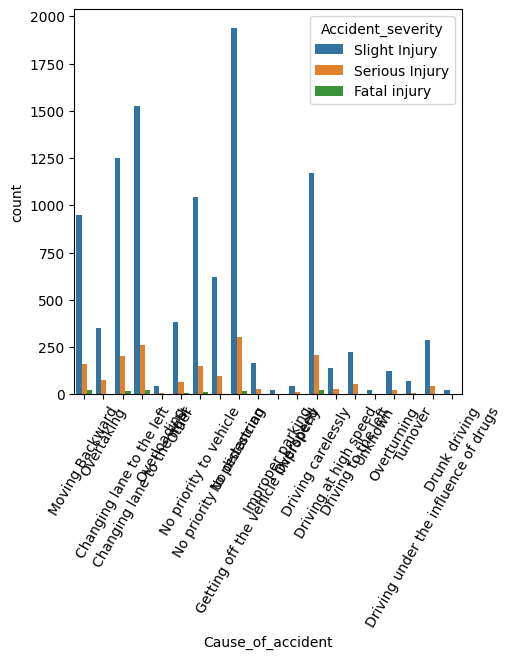

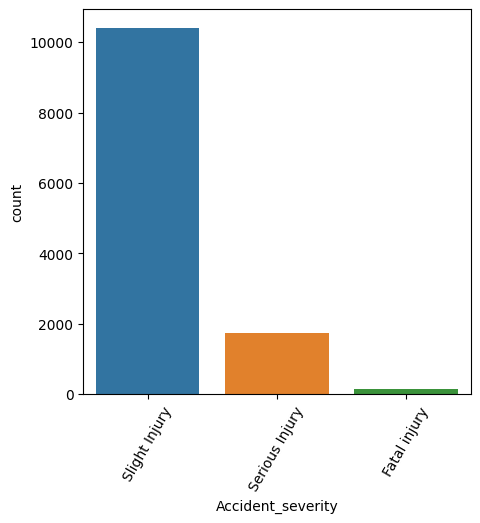

In [23]:
# data visualizationf of categorical cols

def count_plot(col):
    n_df[col].value_counts()

    # plot the figure of count plot
    plt.figure(figsize=(5,5))
    sns.countplot(x=col, hue='Accident_severity', data=n_df)
    plt.xlabel(f'{col}')
    plt.xticks(rotation=60)
    plt.show

for col in obj_cols:
    count_plot(col)

<Figure size 500x500 with 0 Axes>

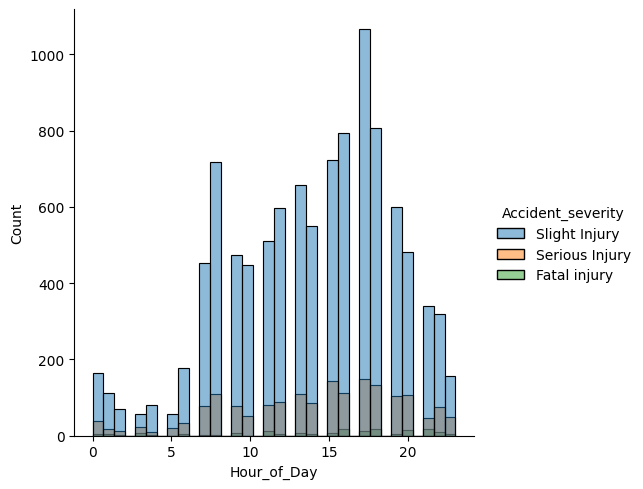

In [24]:
# disribution of hour of the day
plt.figure(figsize=(5,5))
sns.displot(x='Hour_of_Day', hue='Accident_severity', data=n_df)
plt.show()

In [25]:
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']
len(features)

17

In [26]:
# new dataframe generated
featureset_df = n_df[features]
target = n_df['Accident_severity']

In [27]:
# meta data of the new sub dataset
featureset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12077 non-null  object
 4   Types_of_Junction            11429 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            11575 non-null  object
 8   Vehicle_driver_relation      11737 non-null  object
 9   Type_of_vehicle              11366 non-null  object
 10  Driving_experience           11487 non-null  object
 11  Service_year_of_vehicle      8388 non-null   object
 12  Type_of_collision            12161 non-null  object
 13  Sex_of_casualty              12

In [28]:
feature_df = featureset_df.copy()

In [29]:
# NaN are missing because service info might not be available, we will fill as 'Unknowns'
feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
feature_df['Types_of_Junction'] = feature_df['Types_of_Junction'].fillna('Unknown')
feature_df['Area_accident_occured'] = feature_df['Area_accident_occured'].fillna('Unknown')
feature_df['Driving_experience'] = feature_df['Driving_experience'].fillna('unknown')
feature_df['Type_of_vehicle'] = feature_df['Type_of_vehicle'].fillna('Other')
feature_df['Vehicle_driver_relation'] = feature_df['Vehicle_driver_relation'].fillna('Unknown')
feature_df['Educational_level'] = feature_df['Educational_level'].fillna('Unknown')
feature_df['Type_of_collision'] = feature_df['Type_of_collision'].fillna('Unknown')

In [30]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12316 non-null  object
 4   Types_of_Junction            12316 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            12316 non-null  object
 8   Vehicle_driver_relation      12316 non-null  object
 9   Type_of_vehicle              12316 non-null  object
 10  Driving_experience           12316 non-null  object
 11  Service_year_of_vehicle      12316 non-null  object
 12  Type_of_collision            12316 non-null  object
 13  Sex_of_casualty              12

In [31]:
X = feature_df[features]
y = target

In [32]:
# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(12316, 106)

In [33]:
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)

Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


In [34]:
## mutual info classif to check informative features
mi_calc = mutual_info_classif(encoded_df, y_en, random_state=42)

In [35]:
mi_df = pd.DataFrame({'Columns':encoded_df.columns, 'MI_score':mi_calc})
mi_df.sort_values(by='MI_score',ascending=False).head(15)

,Columns,MI_score
1,Number_of_casualties,0.013183
0,Number_of_vehicles_involved,0.013009
46,Type_of_vehicle_Long lorry,0.006190
69,Service_year_of_vehicle_Below 1yr,0.005561
28,Types_of_Junction_Y Shape,0.005364
11,Area_accident_occured_ Hospital areas,0.005284
61,Driving_experience_5-10yr,0.005004
26,Types_of_Junction_Unknown,0.004723
104,Cause_of_accident_Turnover,0.004536
5,Day_of_week_Sunday,0.004210


In [36]:
# feature seleciton method using chi2 for categorical output, categorical input
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)
X_new.shape
cols = fs.get_feature_names_out()

In [37]:
fs_df = pd.DataFrame(X_new, columns=cols)